# Task 1
1. Do the Exploratory Data Analysis & share the insights.
2. How would you segment customers based on their risk (of default).
3. Which of these segments / sub-segments would you propose be approved?
    - For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?
4. Tell us what your observations were on the data itself (completeness, skews).

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
applicant = pd.read_csv("D://CSV files//Reunion assignment data//data//applicant.csv")
loan = pd.read_csv("D://CSV files//Reunion assignment data//data//loan.csv")

In [3]:
applicant.head().T

,0,1,2,3,4
applicant_id,1469590,1203873,1432761,1207582,1674436
Primary_applicant_age_in_years,67,22,49,45,53
Gender,male,female,male,male,male
Marital_status,single,divorced/separated/married,single,single,single
Number_of_dependents,1,1,2,2,2
Housing,own,own,own,for free,for free
Years_at_current_residence,4,2,3,4,4
Employment_status,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,skilled employee / official
Has_been_employed_for_at_least,7 years,1 year,4 years,4 years,1 year
Has_been_employed_for_at_most,NaN,4 years,7 years,7 years,4 years


In [4]:
loan.head().T

,0,1,2,3,4
loan_application_id,d68d975e-edad-11ea-8761-1d6f9c1ff461,d68d989e-edad-11ea-b1d5-2bcf65006448,d68d995c-edad-11ea-814a-1b6716782575,d68d99fc-edad-11ea-8841-17e8848060ae,d68d9a92-edad-11ea-9f3d-1f8682db006a
applicant_id,1469590,1203873,1432761,1207582,1674436
Months_loan_taken_for,6,48,12,42,24
Purpose,electronic equipment,electronic equipment,education,FF&E,new vehicle
Principal_loan_amount,1169000,5951000,2096000,7882000,4870000
EMI_rate_in_percentage_of_disposable_income,4,2,2,2,3
Property,real estate,real estate,real estate,building society savings agreement/life insurance,NaN
Has_coapplicant,0,0,0,0,0
Has_guarantor,0,0,0,1,0
Other_EMI_plans,NaN,NaN,NaN,NaN,NaN


### As the dataset is in 2 parts so we can merge these 2 data sets in 1 by using `application_id` 

### Merging the 2 datasets

In [11]:
df = applicant.merge(loan, right_on='applicant_id',left_on='applicant_id')

In [12]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
applicant_id,1469590,1203873,1432761,1207582,1674436,1213971,1428822,1705739,1715169,1722991,...,1354034,1365267,1237705,1609685,1615010,1880194,1114064,1758046,1824545,1660770
Primary_applicant_age_in_years,67,22,49,45,53,35,53,35,61,28,...,37,34,23,30,50,31,40,38,23,27
Gender,male,female,male,male,male,male,male,male,male,male,...,male,male,male,male,male,female,male,male,male,male
Marital_status,single,divorced/separated/married,single,single,single,single,single,single,divorced/separated,married/widowed,...,single,single,married/widowed,single,single,divorced/separated/married,divorced/separated,single,single,single
Number_of_dependents,1,1,2,2,2,2,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
Housing,own,own,own,for free,for free,for free,own,rent,own,own,...,own,own,rent,own,own,own,own,own,for free,own
Years_at_current_residence,4,2,3,4,4,4,4,2,4,2,...,1,4,4,3,3,4,4,4,4,4
Employment_status,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,management / self-employed / highly qualified ...,unskilled - resident,management / self-employed / highly qualified ...,...,unskilled - resident,unskilled - resident,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,skilled employee / official
Has_been_employed_for_at_least,7 years,1 year,4 years,4 years,1 year,1 year,7 years,1 year,4 years,NaN,...,0 year,7 years,4 years,NaN,7 years,4 years,1 year,7 years,1 year,NaN
Has_been_employed_for_at_most,NaN,4 years,7 years,7 years,4 years,4 years,NaN,4 years,7 years,0 year,...,1 year,NaN,7 years,0 year,NaN,7 years,4 years,NaN,4 years,0 year


In [33]:
df.shape

(1000, 27)

In [18]:
print("Length of applicant dataset is {}".format(len(applicant.columns)))
print("Length of loan dataset is {}".format(len(loan.columns)))
print("Length of combined dataset is {}".format(len(df.columns)))

Length of applicant dataset is 15
Length of loan dataset is 13
Length of combined dataset is 27


In [19]:
df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

## Name and discription of columns

- `applicant_id`: Application ID of each Applicant
- `Primary_applicant_age_in_years`: 
- `Gender`: Gender of each applicant
- `Marital_status`: Marriage status 
- `Number_of_dependents`: Number of depend people of applicant
- `Housing`: House of the applicant
- `Years_at_current_residence`: For how many years does the applicant is living in the place
- `Employment_status`: The employment status
- `Has_been_employed_for_at_least`: Atleast for how long the applicant is employed
- `Has_been_employed_for_at_most`: Atmost for how long the applicant is employed
- `Telephone`: Telephone type
- `Foreign_worker`: 
- `Savings_account_balance`: Type of Account balance of saving account (Low/ Medium/ High)
- `Balance_in_existing_bank_account_(lower_limit_of_bucket)`: 
- `Balance_in_existing_bank_account_(upper_limit_of_bucket)`: 
- `loan_application_id`: Application ID of loan
- `Months_loan_taken_for`: The Duration of loan
- `Purpose`: Purpose of loan
- `Principal_loan_amount`: The amount of loan
- `EMI_rate_in_percentage_of_disposable_income`: Interest rate
- `Property`: The type of property applicant own
- `Has_coapplicant`: Does the applicant has any co-aplicant
- `Has_guarantor`: Does the applicant has any guarantor
- `Other_EMI_plans`: Does the applicant has any other EMI plans
- `Number_of_existing_loans_at_this_bank`: How many loan does the applicant has on the current bank
- `Loan_history`: Does the applicant has any loan history
- `high_risk_applicant`: Is the applicant high risk (1) or low risk (0)

### Describing the data

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,1000.0,1514763.121,2.286764e+05,1105364.0,1321398.0,1529114.5,1707751.75,1903505.0
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.00,75.0
Number_of_dependents,1000.0,1.155,3.620858e-01,1.0,1.0,1.0,1.00,2.0
Years_at_current_residence,1000.0,2.845,1.103718e+00,1.0,2.0,3.0,4.00,4.0
Foreign_worker,1000.0,0.963,1.888562e-01,0.0,1.0,1.0,1.00,1.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.00,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.00,18424000.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.00,4.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.00,1.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.00,1.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

#### Here following columns has null values
1. Has_been_employed_for_at_least
2. Has_been_employed_for_at_most
3. Telephone
4. Purpose
5. Property
6. Other_EMI_plans
7. Savings_account_balance
8. Balance_in_existing_bank_account_(lower_limit_of_bucket)
9. Balance_in_existing_bank_account_(upper_limit_of_bucket)  

### Splitting the numerical and categorical columns

In [29]:
df.dtypes

applicant_id                                                 int64
Primary_applicant_age_in_years                               int64
Gender                                                      object
Marital_status                                              object
Number_of_dependents                                         int64
Housing                                                     object
Years_at_current_residence                                   int64
Employment_status                                           object
Has_been_employed_for_at_least                              object
Has_been_employed_for_at_most                               object
Telephone                                                   object
Foreign_worker                                               int64
Savings_account_balance                                     object
Balance_in_existing_bank_account_(lower_limit_of_bucket)    object
Balance_in_existing_bank_account_(upper_limit_of_bucket)    ob

In [31]:
num_col = [i for i in df.columns
              if df[i].dtypes == 'int64']
num_col

['applicant_id',
 'Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

In [32]:
cat_col = [i for i in df.columns
              if df[i].dtypes == 'object']
cat_col

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Other_EMI_plans',
 'Loan_history']

# 1. EDA on target 

In [65]:
df['high_risk_applicant'].value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

<AxesSubplot:xlabel='high_risk_applicant', ylabel='count'>

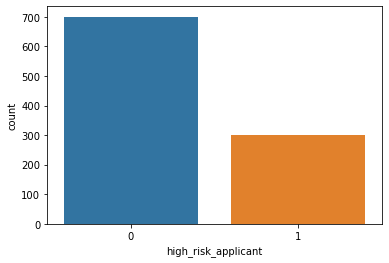

In [49]:
sns.countplot(x='high_risk_applicant', data=df)

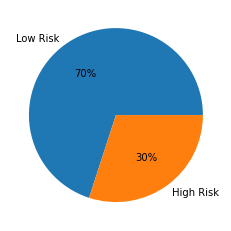

In [64]:
plt.pie(df['high_risk_applicant'].value_counts(),labels=['Low Risk','High Risk'], autopct='%1.0f%%')
plt.show()

In [57]:
print(f"Perentage of high and low risk applicant \n{df['high_risk_applicant'].value_counts()/10}")

Perentage of high and low risk applicant 
0    70.0
1    30.0
Name: high_risk_applicant, dtype: float64


### Observations for target column:
- 70% of the applicants are of low risk and 30% of the applicants are of high risk
- The target column is imbalanced. It has more values of low applicant and less values of high applicants

# EDA on Independent Features

### Univariate analysis on categorical features

In [70]:

for i in cat_col:

    print(df[i].value_counts())
    print()
    print("-"*40)

male      690
female    310
Name: Gender, dtype: int64

----------------------------------------
single                        548
divorced/separated/married    310
married/widowed                92
divorced/separated             50
Name: Marital_status, dtype: int64

----------------------------------------
own         713
rent        179
for free    108
Name: Housing, dtype: int64

----------------------------------------
skilled employee / official                                         630
unskilled - resident                                                200
management / self-employed / highly qualified employee / officer    148
unemployed / unskilled - non-resident                                22
Name: Employment_status, dtype: int64

----------------------------------------
1 year     339
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64

----------------------------------------
4 years    339
7 years    174
1 year     172
0 year

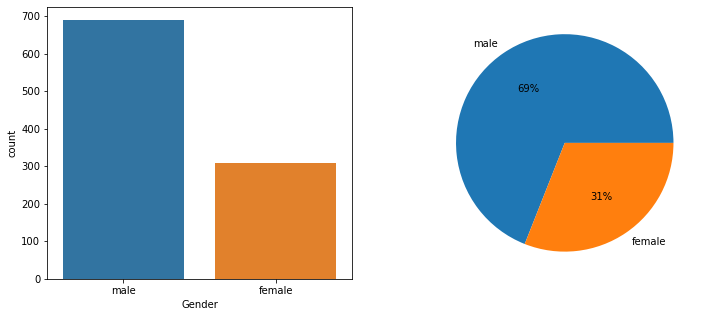

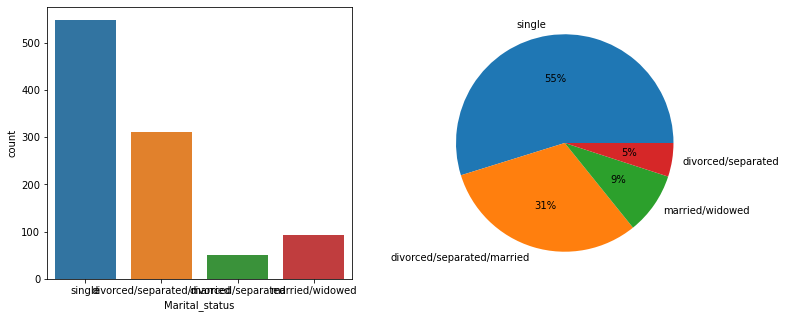

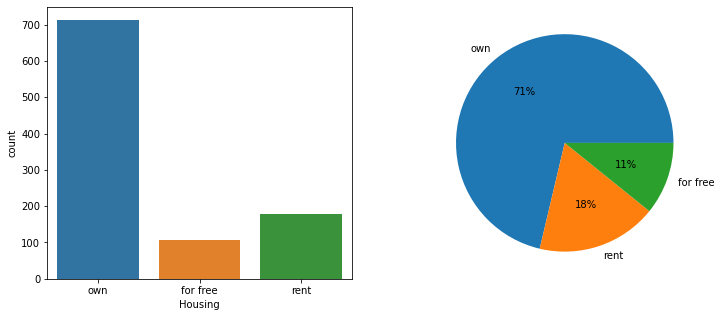

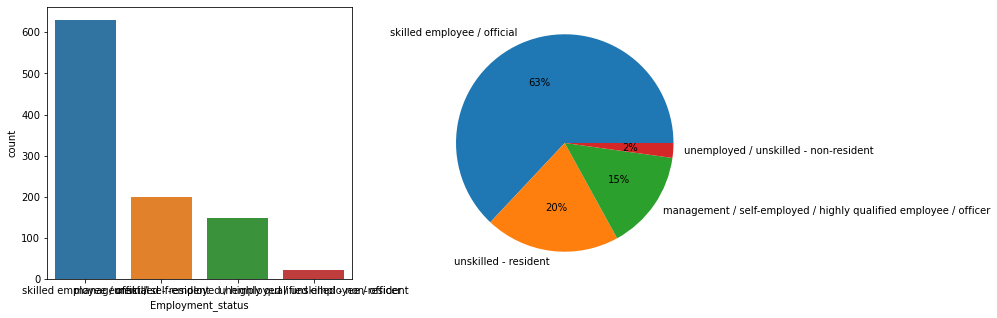

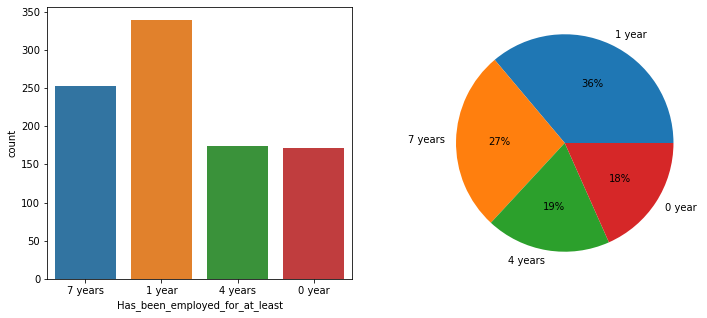

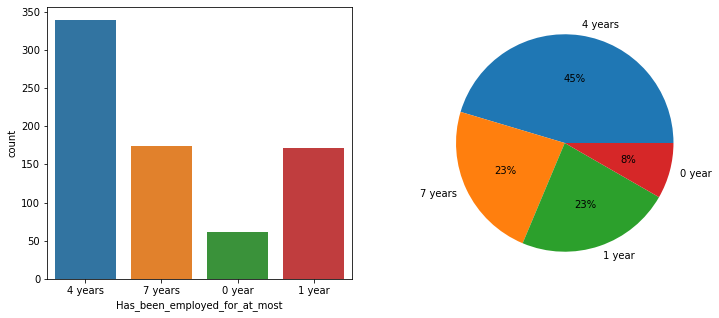

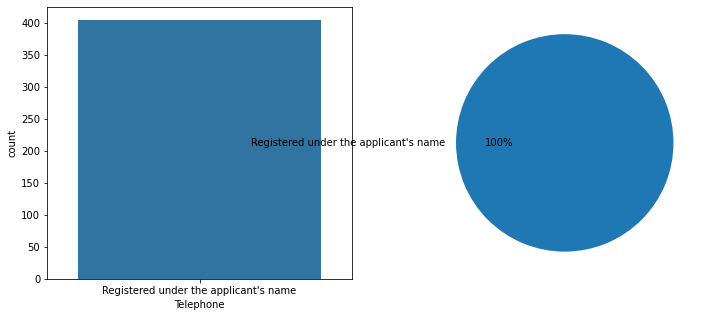

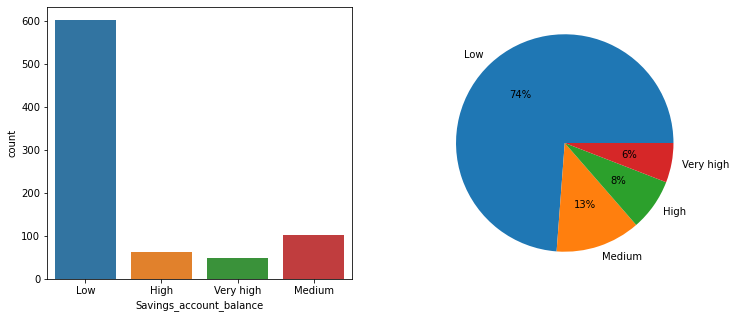

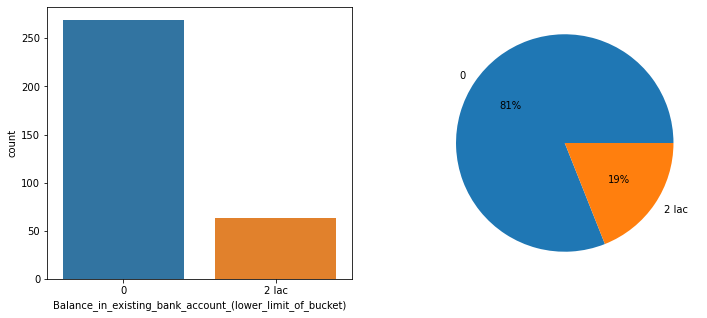

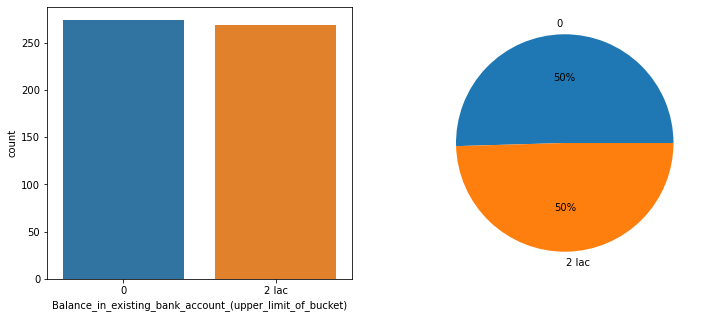

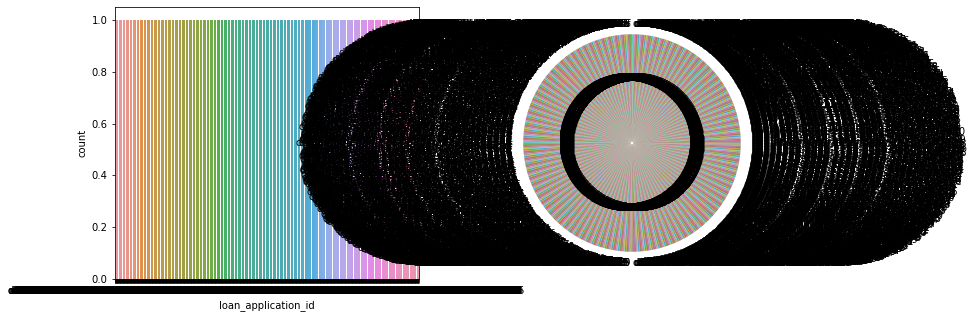

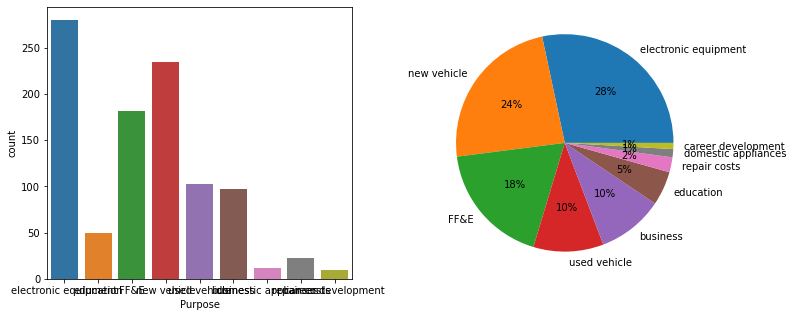

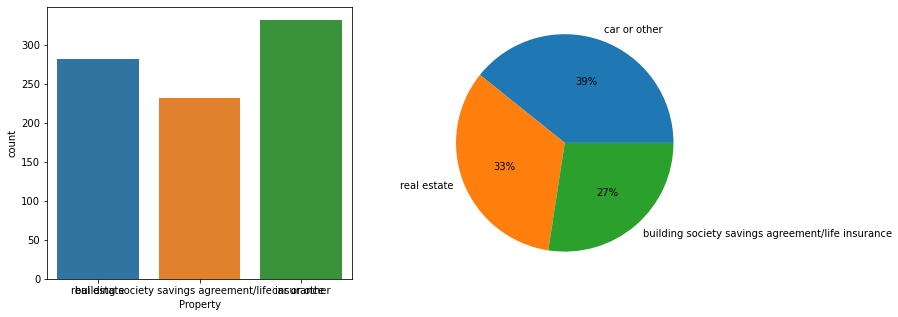

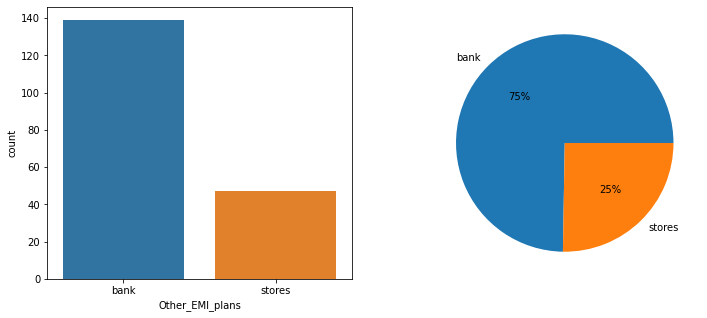

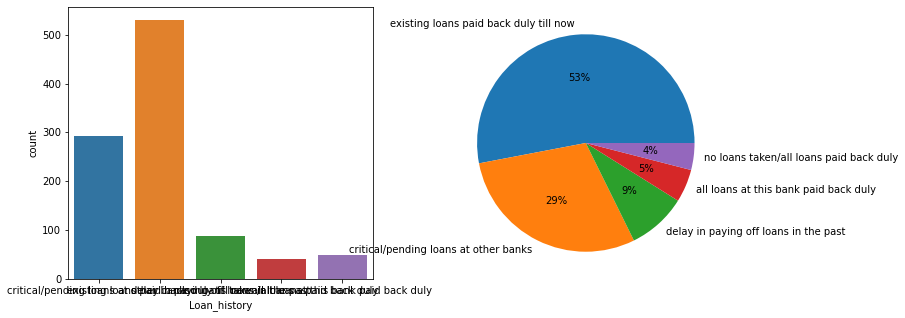

In [102]:
for i in cat_col:
    fig,ax = plt.subplots(1,2 , figsize=(12,5))
    label = df[i].value_counts().index

    sns.countplot(x=i, data = df , ax=ax[0])
    ax[1] = plt.pie(df[i].value_counts() , autopct='%1.0f%%' , labels = label)
    

### Observations:
- 69% of the applicants are male and 31% are female
- About 55% of the applicants are single and only 9% are married. `This means single people then to take more loan.`
- Most of the people who applied for loan have their own house.
- 63% of applicant are skilled employee and rest are either unskilled or self employed.
- More than 50% people have been employed for more than 1 year. `This means newly employed people take more loan`.
- Most of the people have low saving account balance. ` People with low saving bank balance take more loan`
- About 24% of people applied loan for new vehicle, 28% for electronic equipment and only 5% for education.`
- About 33% of the applicant own real estate property.
- About half of the people have paid their loan back. 29% have pending loan and 4% have no loan taken.

=====================================================================================================================

### Univariate analysis on numerical features

In [107]:
num_col = set(num_col) - set(['applicant_id','high_risk_applicant'])
num_col

{'EMI_rate_in_percentage_of_disposable_income',
 'Foreign_worker',
 'Has_coapplicant',
 'Has_guarantor',
 'Months_loan_taken_for',
 'Number_of_dependents',
 'Number_of_existing_loans_at_this_bank',
 'Primary_applicant_age_in_years',
 'Principal_loan_amount',
 'Years_at_current_residence'}

In [111]:
df[num_col].describe().T

C:\Users\shrey\AppData\Local\Temp\ipykernel_11064\214406808.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[num_col].describe().T


,count,mean,std,min,25%,50%,75%,max
Number_of_dependents,1000.0,1.155,3.620858e-01,1.0,1.0,1.0,1.0,2.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.0,1.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.0,1.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.0,18424000.0
Number_of_existing_loans_at_this_bank,1000.0,1.407,5.776545e-01,1.0,1.0,1.0,2.0,4.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.0,72.0
Foreign_worker,1000.0,0.963,1.888562e-01,0.0,1.0,1.0,1.0,1.0
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.0,75.0
Years_at_current_residence,1000.0,2.845,1.103718e+00,1.0,2.0,3.0,4.0,4.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.0,4.0


In [127]:
df[num_col].T

C:\Users\shrey\AppData\Local\Temp\ipykernel_11064\1815831346.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[num_col].T


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Number_of_dependents,1,1,2,2,2,2,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
Has_guarantor,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Has_coapplicant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Principal_loan_amount,1169000,5951000,2096000,7882000,4870000,9055000,2835000,6948000,3059000,5234000,...,3565000,1569000,1936000,3959000,2390000,1736000,3857000,804000,1845000,4576000
Number_of_existing_loans_at_this_bank,2,1,1,1,2,1,1,1,1,2,...,2,1,2,1,1,1,1,1,1,1
Months_loan_taken_for,6,48,12,42,24,36,24,36,12,30,...,12,15,18,36,12,12,30,12,45,45
Foreign_worker,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Primary_applicant_age_in_years,67,22,49,45,53,35,53,35,61,28,...,37,34,23,30,50,31,40,38,23,27
Years_at_current_residence,4,2,3,4,4,4,4,2,4,2,...,1,4,4,3,3,4,4,4,4,4
EMI_rate_in_percentage_of_disposable_income,4,2,2,2,3,2,3,2,2,4,...,2,4,2,4,4,3,4,4,4,3


In [149]:
n = [i for i in num_col
        if df[i].nunique()<6]
n

['Number_of_dependents',
 'Has_guarantor',
 'Has_coapplicant',
 'Number_of_existing_loans_at_this_bank',
 'Foreign_worker',
 'Years_at_current_residence',
 'EMI_rate_in_percentage_of_disposable_income']

D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: F

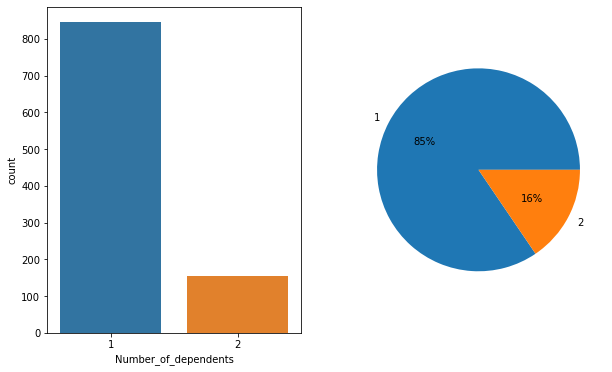

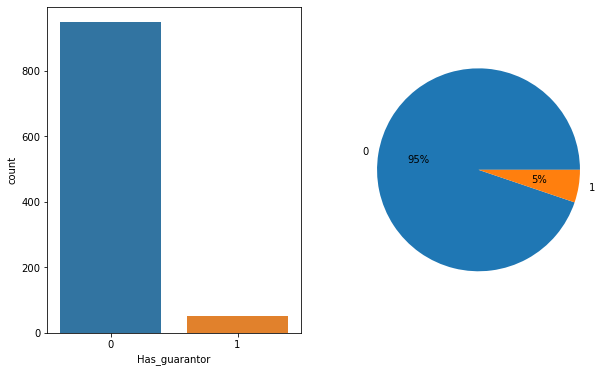

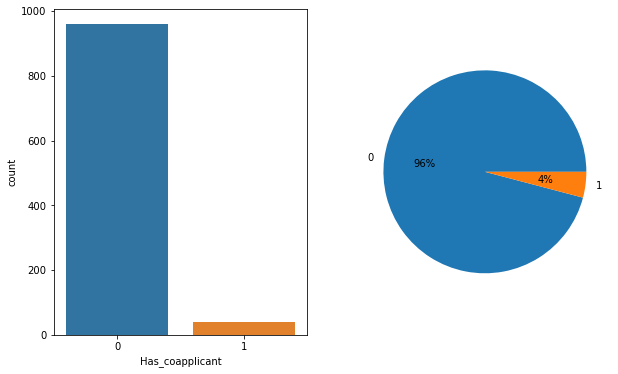

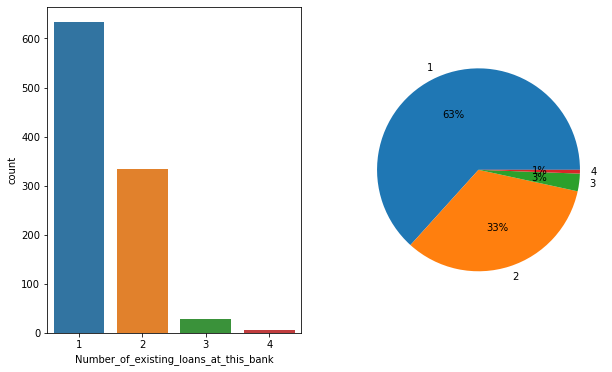

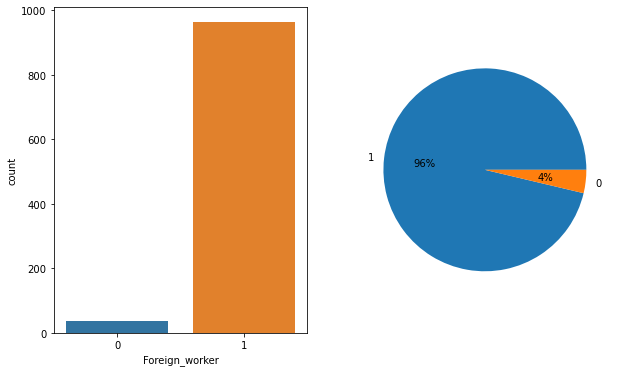

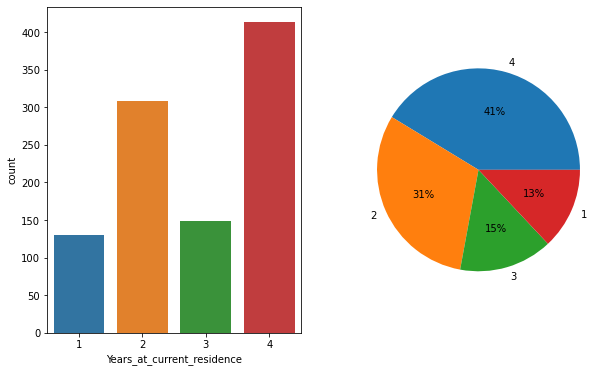

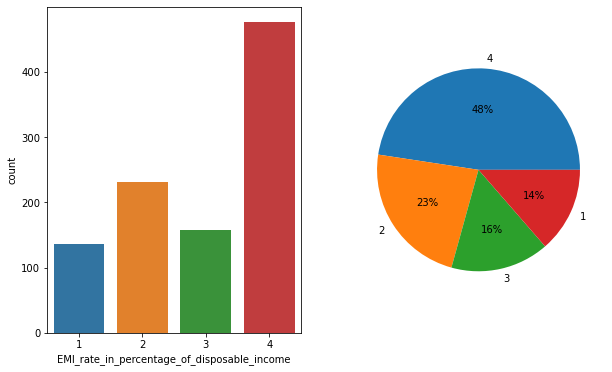

In [154]:
for i in n:
    fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    label = df[i].value_counts().index
    sns.countplot(df[i], ax=ax1)
    ax2= plt.pie(df[i].value_counts(), autopct='%1.0f%%',labels = label)

plt.show()

In [152]:
df[set(num_col)-set(n)].describe()

C:\Users\shrey\AppData\Local\Temp\ipykernel_11064\3551637146.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[set(num_col)-set(n)].describe()


,Primary_applicant_age_in_years,Principal_loan_amount,Months_loan_taken_for
count,1000.000000,1.000000e+03,1000.000000
mean,35.546000,3.271258e+06,20.903000
std,11.375469,2.822737e+06,12.058814
min,19.000000,2.500000e+05,4.000000
25%,27.000000,1.365500e+06,12.000000
50%,33.000000,2.319500e+06,18.000000
75%,42.000000,3.972250e+06,24.000000
max,75.000000,1.842400e+07,72.000000


D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\in\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\in\lib\site-packa

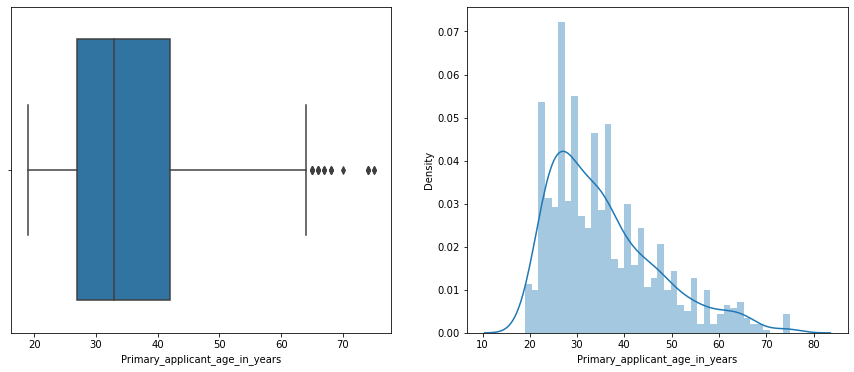

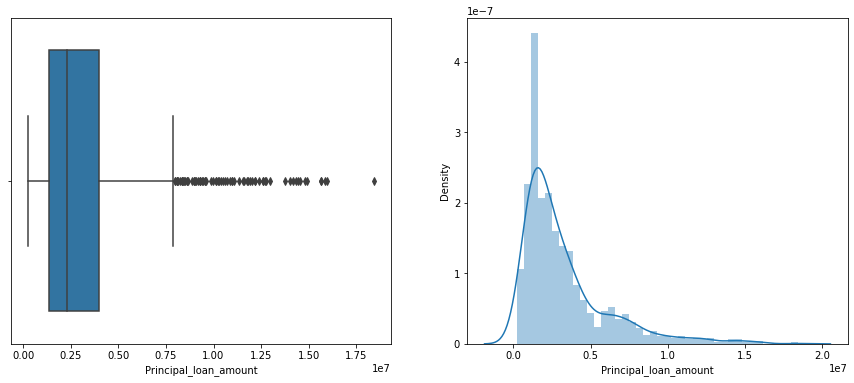

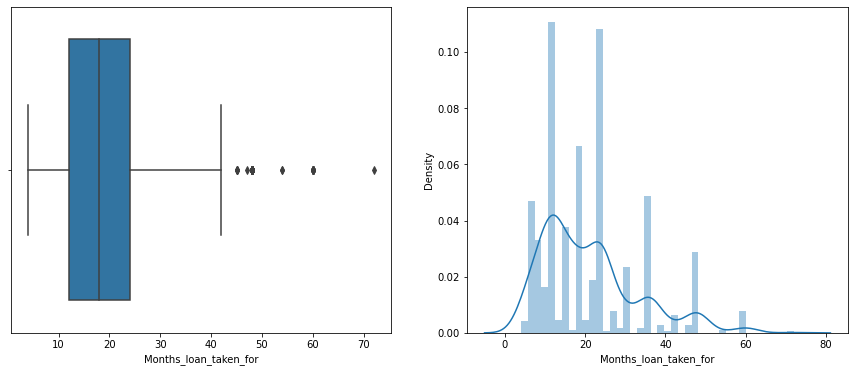

In [190]:
x = list(set(num_col)-set(n))
for i in x:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    label = df[i].value_counts().index
    sns.boxplot(df[i],ax=ax[0])
    sns.distplot(df[i],ax=ax[1],bins=40)
plt.show()

In [183]:
x = list(set(num_col)-set(n))
df[x].describe()

,Primary_applicant_age_in_years,Principal_loan_amount,Months_loan_taken_for
count,1000.000000,1.000000e+03,1000.000000
mean,35.546000,3.271258e+06,20.903000
std,11.375469,2.822737e+06,12.058814
min,19.000000,2.500000e+05,4.000000
25%,27.000000,1.365500e+06,12.000000
50%,33.000000,2.319500e+06,18.000000
75%,42.000000,3.972250e+06,24.000000
max,75.000000,1.842400e+07,72.000000


### Observations:
- About 85% people has only one dependent person to the applicant
- Almost all the people do not have any guarantor and any coapplicant
- About 63% of people have only 1 existing loan and only 4% has 3 or more loans.
- Most people have been living at the current resident for 2 or more years.
- 48% of people have 4% EMI rate and only 14% people have 1% EMI rate.
- Then Average age of applicant is 35. 
- The oldest applicant is of 75 age. While the youngest applicant is of 19 years.
- About 75% of people are of less than 42 age.
- The minimum amount of loan demand is 250000 and maximum amount of loan demand is 18424000.
- The average amount of loan is 3271248
- Most people have taken loan for 5 to 24 month.

======================================================================================================================

### Bivariate anlysis

In [202]:
num_col = list(num_col)

In [204]:
df[cat_col].T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Gender,male,female,male,male,male,male,male,male,male,male,...,male,male,male,male,male,female,male,male,male,male
Marital_status,single,divorced/separated/married,single,single,single,single,single,single,divorced/separated,married/widowed,...,single,single,married/widowed,single,single,divorced/separated/married,divorced/separated,single,single,single
Housing,own,own,own,for free,for free,for free,own,rent,own,own,...,own,own,rent,own,own,own,own,own,for free,own
Employment_status,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,skilled employee / official,unskilled - resident,skilled employee / official,management / self-employed / highly qualified ...,unskilled - resident,management / self-employed / highly qualified ...,...,unskilled - resident,unskilled - resident,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,unskilled - resident,management / self-employed / highly qualified ...,skilled employee / official,skilled employee / official,skilled employee / official
Has_been_employed_for_at_least,7 years,1 year,4 years,4 years,1 year,1 year,7 years,1 year,4 years,NaN,...,0 year,7 years,4 years,NaN,7 years,4 years,1 year,7 years,1 year,NaN
Has_been_employed_for_at_most,NaN,4 years,7 years,7 years,4 years,4 years,NaN,4 years,7 years,0 year,...,1 year,NaN,7 years,0 year,NaN,7 years,4 years,NaN,4 years,0 year
Telephone,Registered under the applicant's name,NaN,NaN,NaN,NaN,Registered under the applicant's name,NaN,Registered under the applicant's name,NaN,NaN,...,NaN,NaN,NaN,Registered under the applicant's name,Registered under the applicant's name,NaN,Registered under the applicant's name,NaN,Registered under the applicant's name,NaN
Savings_account_balance,NaN,Low,Low,Low,Low,NaN,High,Low,Very high,Low,...,NaN,Medium,NaN,Low,NaN,Low,Low,Low,Low,Medium
Balance_in_existing_bank_account_(lower_limit_of_bucket),NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Balance_in_existing_bank_account_(upper_limit_of_bucket),0,2 lac,NaN,0,0,NaN,NaN,2 lac,NaN,2 lac,...,NaN,NaN,0,0,NaN,NaN,0,NaN,0,2 lac


In [203]:
df[num_col].T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Number_of_dependents,1,1,2,2,2,2,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
Has_guarantor,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Has_coapplicant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Principal_loan_amount,1169000,5951000,2096000,7882000,4870000,9055000,2835000,6948000,3059000,5234000,...,3565000,1569000,1936000,3959000,2390000,1736000,3857000,804000,1845000,4576000
Number_of_existing_loans_at_this_bank,2,1,1,1,2,1,1,1,1,2,...,2,1,2,1,1,1,1,1,1,1
Months_loan_taken_for,6,48,12,42,24,36,24,36,12,30,...,12,15,18,36,12,12,30,12,45,45
Foreign_worker,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Primary_applicant_age_in_years,67,22,49,45,53,35,53,35,61,28,...,37,34,23,30,50,31,40,38,23,27
Years_at_current_residence,4,2,3,4,4,4,4,2,4,2,...,1,4,4,3,3,4,4,4,4,4
EMI_rate_in_percentage_of_disposable_income,4,2,2,2,3,2,3,2,2,4,...,2,4,2,4,4,3,4,4,4,3


In [224]:
target='high_risk_applicant'

In [ ]:
plt.style.use('classic')

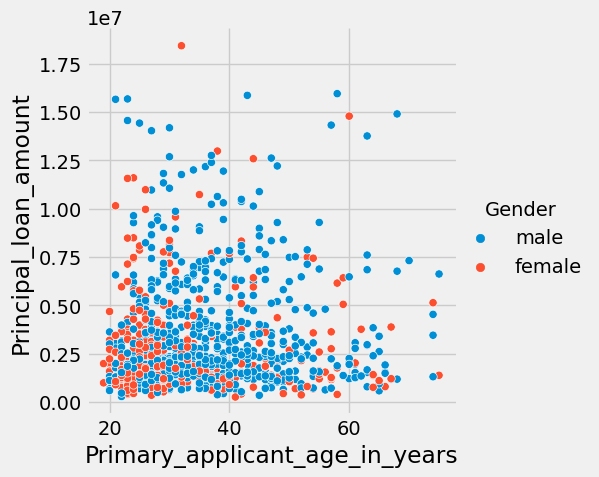

In [229]:
sns.relplot(y='Principal_loan_amount',x='Primary_applicant_age_in_years',data=df,hue = 'Gender')
plt.show()

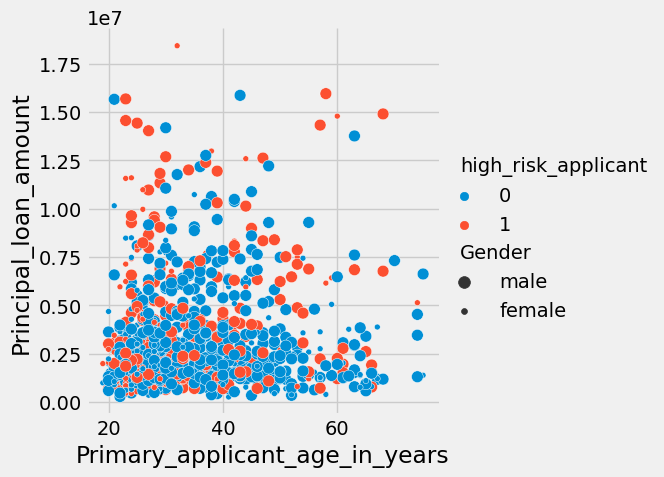

In [260]:
sns.relplot(y='Principal_loan_amount',x='Primary_applicant_age_in_years',data=df,size = 'Gender',hue=target)
plt.show()

In [471]:
pd.crosstab(df['Gender'],df['high_risk_applicant'])

high_risk_applicant,0,1
Gender,,
0,201,109
1,499,191


In [267]:
pd.crosstab(df['Primary_applicant_age_in_years'],df['high_risk_applicant'])

high_risk_applicant,0,1
Primary_applicant_age_in_years,,
19,1,1
20,9,5
21,9,5
22,16,11
23,28,20
24,25,19
25,22,19
26,36,14
27,38,13


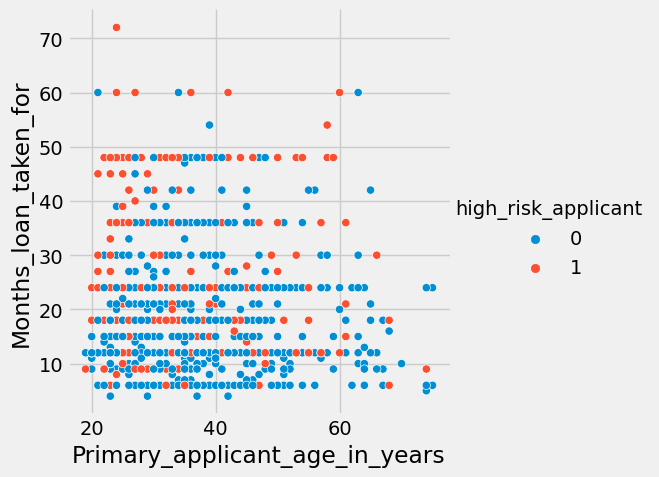

In [273]:
sns.relplot(y='Months_loan_taken_for',x='Primary_applicant_age_in_years',data=df,hue=target)

In [288]:
x = df.groupby(['Primary_applicant_age_in_years']).count()['Months_loan_taken_for'].reset_index()
x

,Primary_applicant_age_in_years,Months_loan_taken_for
0,19,2
1,20,14
2,21,14
3,22,27
4,23,48
5,24,44
6,25,41
7,26,50
8,27,51
9,28,43


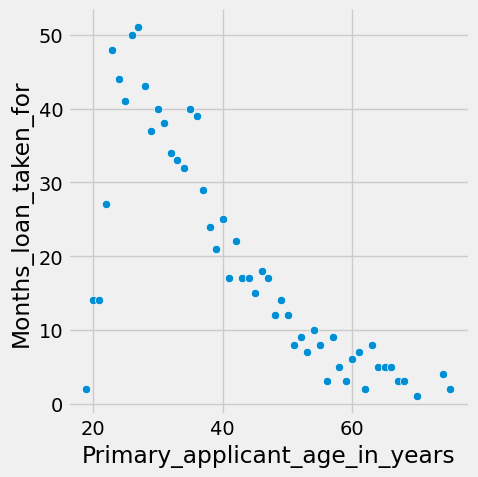

In [289]:
sns.relplot(y='Months_loan_taken_for',x='Primary_applicant_age_in_years',data=x)

In [295]:
plt.style.use('default')

D:\Anaconda\in\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\in\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'single'),
  Text(1, 0, 'divorced/separated/married'),
  Text(2, 0, 'divorced/separated'),
  Text(3, 0, 'married/widowed')])

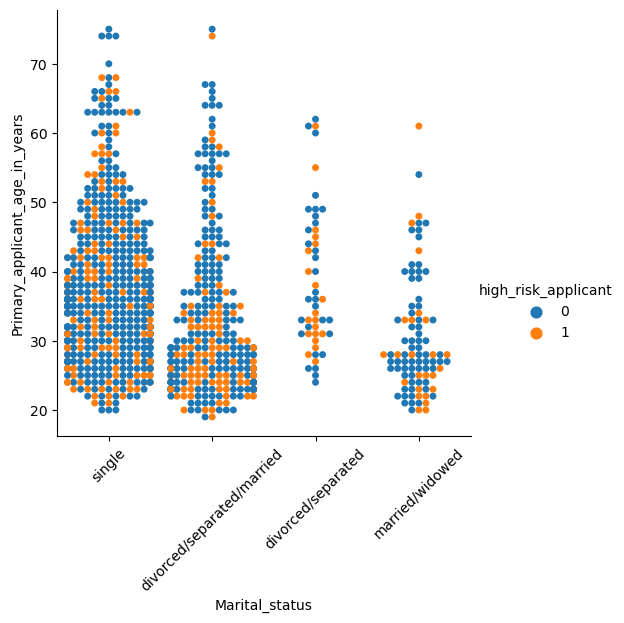

In [298]:
sns.catplot(x='Marital_status',y='Primary_applicant_age_in_years',kind = 'swarm',hue=target,data=df)
plt.xticks(rotation=45)

In [305]:
pd.crosstab(df['Marital_status'],df['high_risk_applicant'])

high_risk_applicant,0,1
Marital_status,,
divorced/separated,30,20
divorced/separated/married,201,109
married/widowed,67,25
single,402,146


In [308]:
pd.crosstab(df['Employment_status'],df['high_risk_applicant'])

high_risk_applicant,0,1
Employment_status,,
management / self-employed / highly qualified employee / officer,97,51
skilled employee / official,444,186
unemployed / unskilled - non-resident,15,7
unskilled - resident,144,56


In [312]:
pd.crosstab(df['Savings_account_balance'],df['high_risk_applicant'])

high_risk_applicant,0,1
Savings_account_balance,,
High,52,11
Low,386,217
Medium,69,34
Very high,42,6


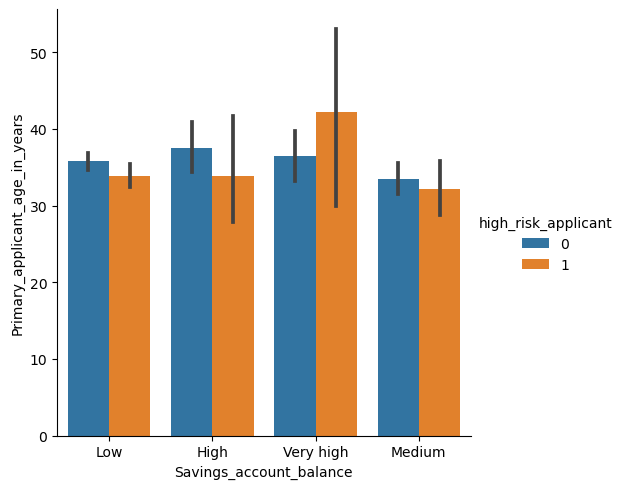

In [320]:
sns.catplot(x='Savings_account_balance',y='Primary_applicant_age_in_years',kind='bar',hue='high_risk_applicant',data=df)

<AxesSubplot:xlabel='Purpose'>

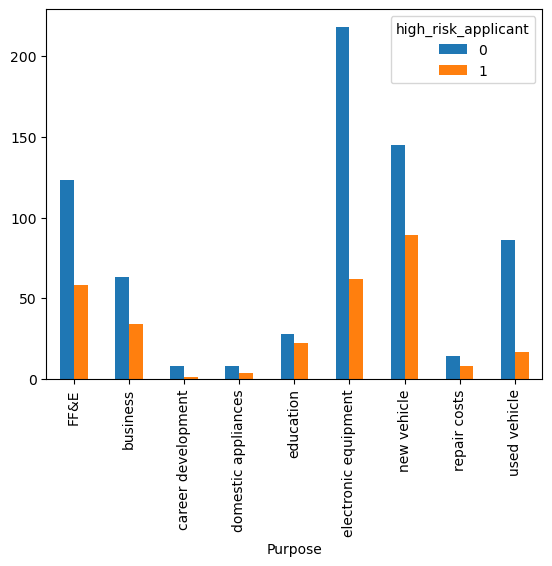

In [323]:
pd.crosstab(df['Purpose'],df['high_risk_applicant']).plot(kind='bar')

In [336]:
pd.crosstab(df['Property'],df['high_risk_applicant'])

high_risk_applicant,0,1
Property,,
building society savings agreement/life insurance,161,71
car or other,230,102
real estate,222,60


<AxesSubplot:xlabel='Property'>

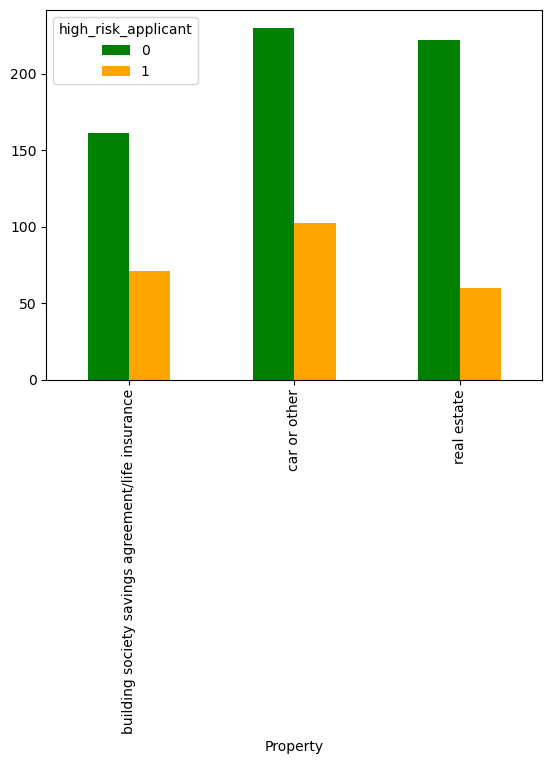

In [335]:
pd.crosstab(df['Property'],df['high_risk_applicant']).plot(kind='bar',color=['green','orange'])

In [348]:
pd.crosstab(df['Loan_history'],df['high_risk_applicant'])

high_risk_applicant,0,1
Loan_history,,
all loans at this bank paid back duly,21,28
critical/pending loans at other banks,243,50
delay in paying off loans in the past,60,28
existing loans paid back duly till now,361,169
no loans taken/all loans paid back duly,15,25


<AxesSubplot:xlabel='Loan_history'>

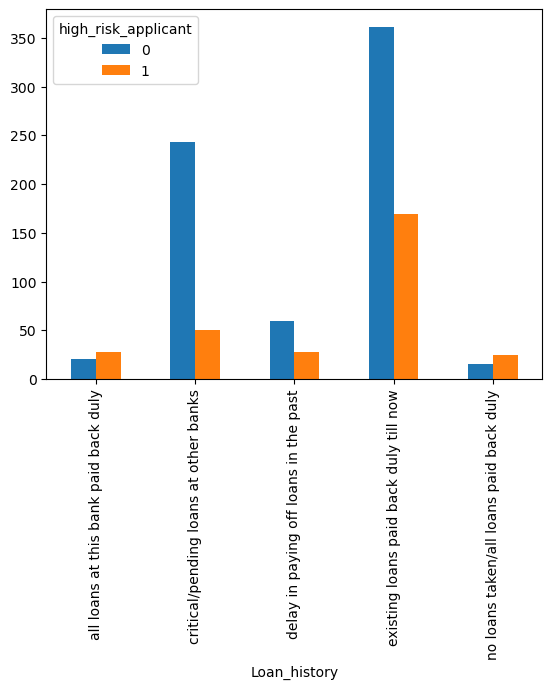

In [349]:
pd.crosstab(df['Loan_history'],df['high_risk_applicant']).plot(kind='bar')

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

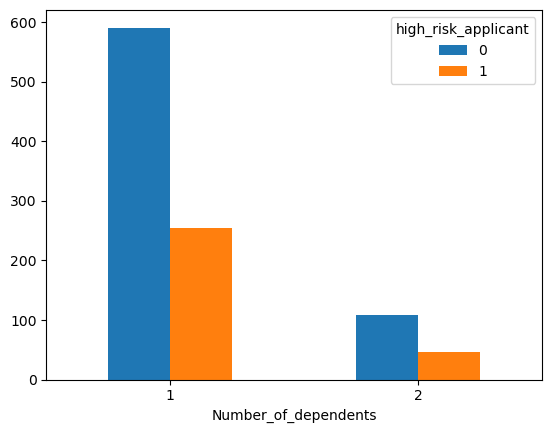

In [357]:
pd.crosstab(df['Number_of_dependents'],df['high_risk_applicant']).plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

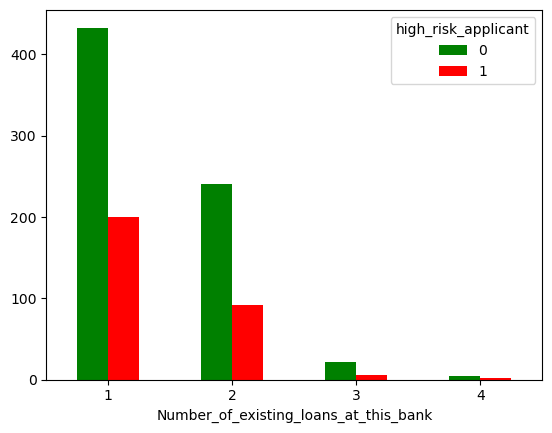

In [362]:
pd.crosstab(df['Number_of_existing_loans_at_this_bank'],df['high_risk_applicant']).plot(kind='bar' , color=['green','red'])
plt.xticks(rotation=0)

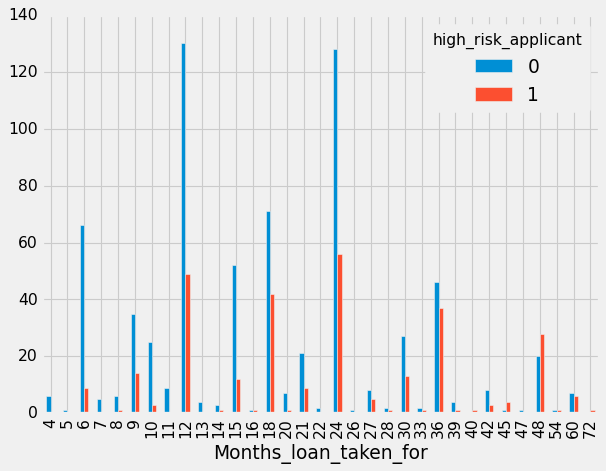

In [397]:
pd.crosstab(df['Months_loan_taken_for'],df['high_risk_applicant']).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Years_at_current_residence'>

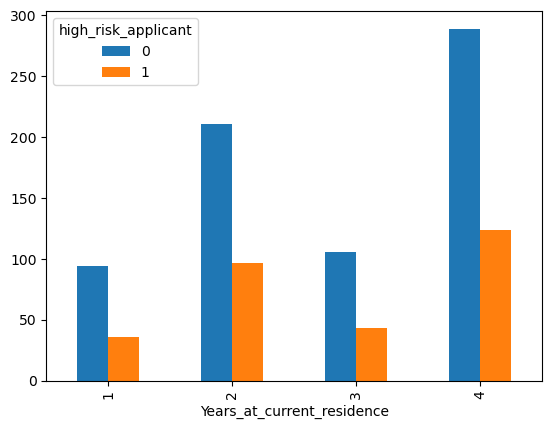

In [383]:
pd.crosstab(df['Years_at_current_residence'],df['high_risk_applicant']).plot(kind='bar')

<AxesSubplot:xlabel='EMI_rate_in_percentage_of_disposable_income'>

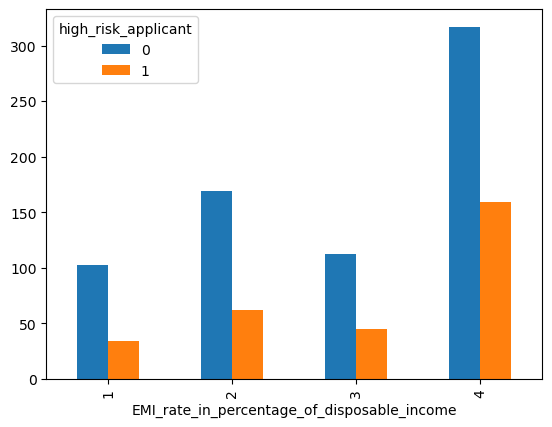

In [385]:
pd.crosstab(df['EMI_rate_in_percentage_of_disposable_income'],df['high_risk_applicant']).plot(kind='bar')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

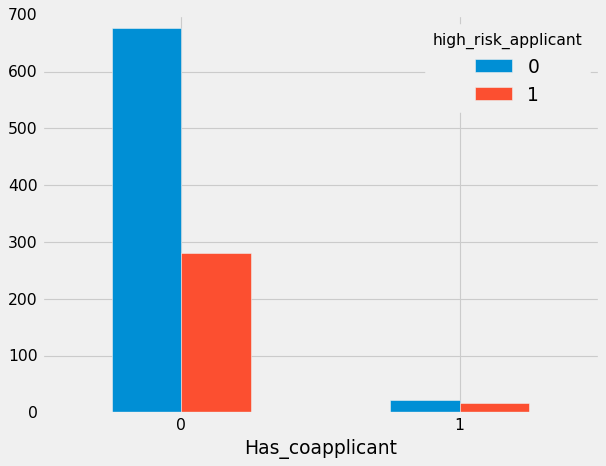

In [478]:
pd.crosstab(df['Has_coapplicant'],df['high_risk_applicant']).plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

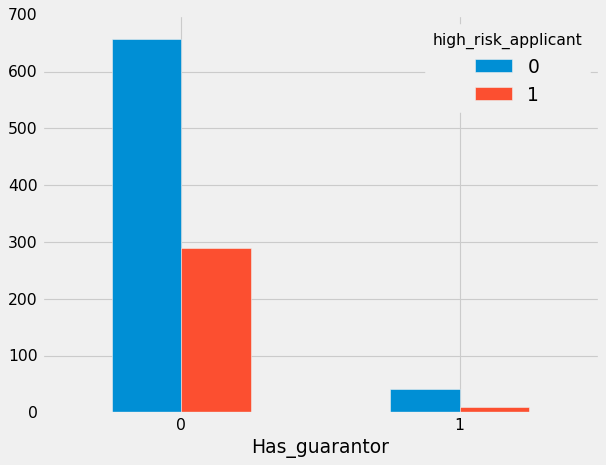

In [479]:
pd.crosstab(df['Has_guarantor'],df['high_risk_applicant']).plot(kind='bar')
plt.xticks(rotation=0)

### Observations:
- Most of the male applicant are low risk applicant.
- 68 is the only age where the high risk applicant are more than low risk applicant.
- People with small age tend to take loan of high duration. As the age increases the people tend to take loan small duration.
- Mostly married/separated/divorced people in the age range of 20-35 are high risk candidate.
- About 1/3 people who are married/separated/divorced are high risk applicant.
- Most number of low risk candidate are skilled employee.
- Most high risk applicant has Low saving account balance
- Highest number of high risk applicant want to buy new vehicle.
- Lowest percentage of applicant with low risk took the lone for electric equipment.
- Most people have real estate or car as property.
- There are more high risk applicant who has 1 dependent person than those who have 2 dependent person.
- Most number of low risk candidate have only 1 or 2 loans.
- Most number of high risk applicant took the loan for 12-24 months.
- For 45,48,72 month loan, the number of high risk applicant are more than low risk applicant.
- People who are living for more years at same place are low risk applicants.
- People who have loan of high interest rate are more likely to be high risk applicant.
- As the loan amount increases, the month loan is taken for also increases. 
- As the amount of loan increase the chance of being defaulter on loan payback also increases.
- Those applicant are low risk applicant who don't have any co-applicant
- Those applicant are low risk applicant who don't have any guarantor


===================================================================================================================

===================================================================================================================

In [393]:
plt.style.use('fivethirtyeight')

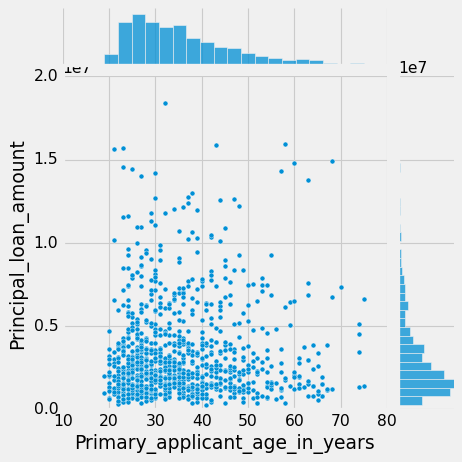

In [394]:
sns.jointplot(x='Primary_applicant_age_in_years',y='Principal_loan_amount',data=df)

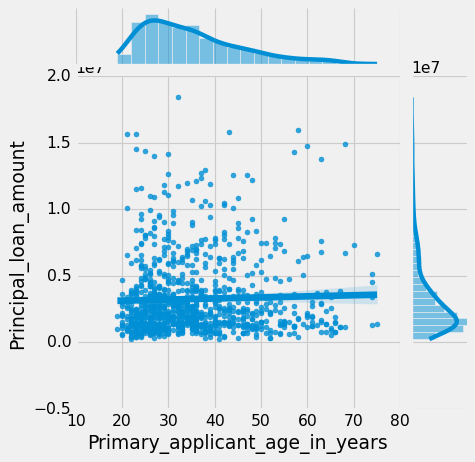

In [395]:
sns.jointplot(x='Primary_applicant_age_in_years',y='Principal_loan_amount',data=df,kind='reg')

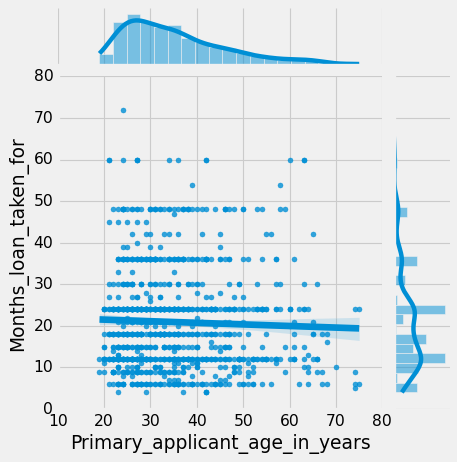

In [401]:
sns.jointplot(x='Primary_applicant_age_in_years',y='Months_loan_taken_for',data=df,kind='reg')

D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\in\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal_loan_amount', ylabel='Density'>

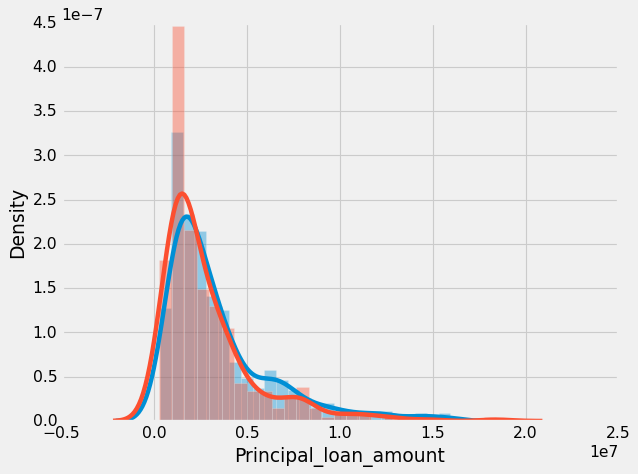

In [408]:
sns.distplot(df[df['Gender']=='male']['Principal_loan_amount'])
sns.distplot(df[df['Gender']=='female']['Principal_loan_amount'])

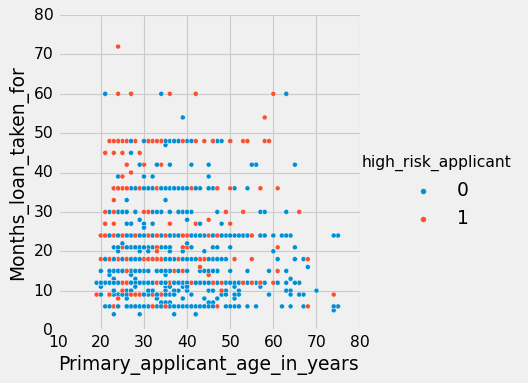

In [421]:
sns.relplot(data=df,x='Primary_applicant_age_in_years',y='Months_loan_taken_for',hue='high_risk_applicant')

=====================================================================================================================

=====================================================================================================================

In [422]:
cat_col

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Other_EMI_plans',
 'Loan_history']

### Combining 'divorced/separated' and 'divorced/separated/married' in Marital_status column

In [ ]:
def func(a):
    if a == 'divorced/separated':
        return 'divorced/separated/married'
    else:
        return a
df['Marital_status']= df['Marital_status'].apply(func)    

## Converting Categorical columns into numerical columns

In [451]:
df['Gender'] = df['Gender'].replace({"male":1,"female":0})

df['Marital_status'] = df['Marital_status'].replace({"single":1,"divorced/separated/married":2,"married/widowed":3})

df['Housing'] = df['Housing'].replace({'own':1,'for free':2, 'rent':3})

df['Employment_status'] = df['Employment_status'].replace({'skilled employee / official':1 , 'unskilled - resident':2,
                                   'management / self-employed / highly qualified employee / officer':3,
                                   'unemployed / unskilled - non-resident':4})

df['Purpose'] = df['Purpose'].replace({'electronic equipment':1, 'education':2, 'FF&E':3, 'new vehicle':4,
                                       'used vehicle':4, 'business':5, 'domestic appliances':6, 
                                       'repair costs':7, 'career development':8 , np.nan:9})

df['Property'] = df['Property'].replace({'real estate':1, 'building society savings agreement/life insurance':2,
                                       np.nan:3, 'car or other':4})

df['Loan_history'] = df['Loan_history'].replace({'critical/pending loans at other banks':1,
                                                 'existing loans paid back duly till now':2,
                                                 'delay in paying off loans in the past':3,
                                                 'no loans taken/all loans paid back duly':4,
                                                 'all loans at this bank paid back duly':5})


In [459]:
df['Savings_account_balance'] = df['Savings_account_balance'].replace({np.nan:0, 'Low':1, 'High':3, 'Very high':4, 'Medium':2})


In [460]:
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,1,1,1,1,4,1,7 years,NaN,...,1.0,1169000,4,1,0,0,NaN,2,1,0
1,1203873,22,0,2,1,1,2,1,1 year,4 years,...,1.0,5951000,2,1,0,0,NaN,1,2,1
2,1432761,49,1,1,2,1,3,2,4 years,7 years,...,2.0,2096000,2,1,0,0,NaN,1,1,0
3,1207582,45,1,1,2,2,4,1,4 years,7 years,...,3.0,7882000,2,2,0,1,NaN,1,2,0
4,1674436,53,1,1,2,2,4,1,1 year,4 years,...,4.0,4870000,3,3,0,0,NaN,2,3,1


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   applicant_id                                              1000 non-null   int64  
 1   Primary_applicant_age_in_years                            1000 non-null   int64  
 2   Gender                                                    1000 non-null   int64  
 3   Marital_status                                            1000 non-null   int64  
 4   Number_of_dependents                                      1000 non-null   int64  
 5   Housing                                                   1000 non-null   int64  
 6   Years_at_current_residence                                1000 non-null   int64  
 7   Employment_status                                         1000 non-null   int64  
 8   Has_been_employed_f

### Finding correlation between features and target

In [470]:
x = df.corr().sort_values(by='high_risk_applicant',ascending=False)['high_risk_applicant'].reset_index()
x

,index,high_risk_applicant
0,high_risk_applicant,1.000000
1,Loan_history,0.232157
2,Months_loan_taken_for,0.214927
3,Principal_loan_amount,0.154739
4,Housing,0.123815
5,Property,0.090146
6,Foreign_worker,0.082079
7,Purpose,0.073752
8,EMI_rate_in_percentage_of_disposable_income,0.072404
9,Has_coapplicant,0.062728


# 2. How would you segment customers based on their risk (of default).

1. Low Risk Applicant: 
    - Male applicant
    - Single applicant
    - Skilled employee
    - Applicant who took loan to but electric equipments, FF&E ,business , career development and used cars
    - Applicant with only 1 dependent person
    - With good loan history
    - Applicant who has 1-2 loans only
    - Applicant who are living at the same place for more years
    


2. High Risk Applicant:
    - Applicant who are married in age of 20-35
    - Applicant with low saving account balance
    - Applicant who wants took loan for new vehicle, education and repair cost
    - Applicant who has loan for 12-24 month duration
    - Applicant who has high interest rate for their loan

# 3. Which of these segments / sub-segments would you propose be approved?

- According to me, those applicants who is a unmarried male with a job ,with good loan history , balance in saving account and only 1 dependent person is more credit worthy.
- Also those people who lack 2-3 things from the above mentioned things can still be considered as credit worthy.
- But the people with low saving bank balance, in age of 19-30, married and who has taken loan at high interest rate are less credit worthy.

# 4. Tell us what your observations were on the data itself (completeness, skews).

- `Completeness:` The data is mostly complete but few columns have incomplete data. In these few columns, some columns have more than 40% missing data that is neither good nor recoverable. So, even if these columns are important we have to drop them because we can not fill these values by any way.
- `Skewness:` If we talk about skewness, some of the numerical column are showing positive skewness. Although the positive skewness can be made into normal distribution by applying log transformation because log transformer transforms positive skewed data into normal distribution.